In [209]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

# Pacote para tratamento de datas
from datetime import datetime
from datetime import timedelta

## Objetivo do Estudo:

Direcionar a equipe de marketing na sexta campanha da empresa. Para este estudo foram coletadas informações de usuários da base de forma aleatória, em um total de 2240 anotações.<p>
A campanha piloto custou ao departamento um total de 6.720MU e o retorno foi de 3.674MU, com uma taxa de sucesso de 15%. Esta porcentagem corresponde a 334 clientes que fizeram a aquisição do gadget.
Podemos inferir que cada gadget foi vendido por um valor médio de 11MU e, que para recuperar o valor investido é necessário a venda de mais 277 unidades.

O estudo a seguir analisa, de forma pragmática, cada feature da amostra e nos norteia como esta a aceitação do nosso market share. Ao final do estudo culminamos o resultado para a criação de um modelo preditivo de classificação.

## Metadata Table




![title](images/metadata_table.jpg)

In [210]:
arquivo_01 = ('ml_project1_data.csv')

df_inicial = pd.read_csv(arquivo_01, sep = ',')

In [211]:
df_inicial.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [212]:
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 

</p>
O dataset possui valores missing na feature incoming, poderemos seguir a analise sem necessidade de tratamento destes dados. </p>


# EDA - Exploratory Data Analysys

A analise exploratória foi dividida em 3 grandes grupos:

- 01 - Perfil dos Entrevistados:

Analise do perfil do entrevistado, levando em consideração informações pessoais e familiares. Aqui pode-se analisar escolaridade, idade, nucleo familiar, entre outras características.

- 02 - Perfil dos Produtos


- 03 - Meios de Venda
- 04 - Analise das Campanhas

# 01 - Perfil dos Entrevistados

### 01.1 - Year of Birth

In [213]:
df_inicial['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

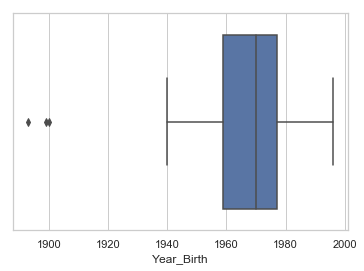

In [214]:
ax = sns.boxplot(x = df_inicial['Year_Birth'])

In [215]:
df_inicial.loc[df_inicial['Year_Birth'] < 1920]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,3,11,0


Detectado acima a existencia de 3 outliers, a informação será mantida no dataset por enquanto e será avaliado se estes dados serão tratados na criação do modelo.

In [216]:
df_inicial['Age'] =  2022 - df_inicial['Year_Birth'] 

In [217]:
df_inicial.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,38
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,41


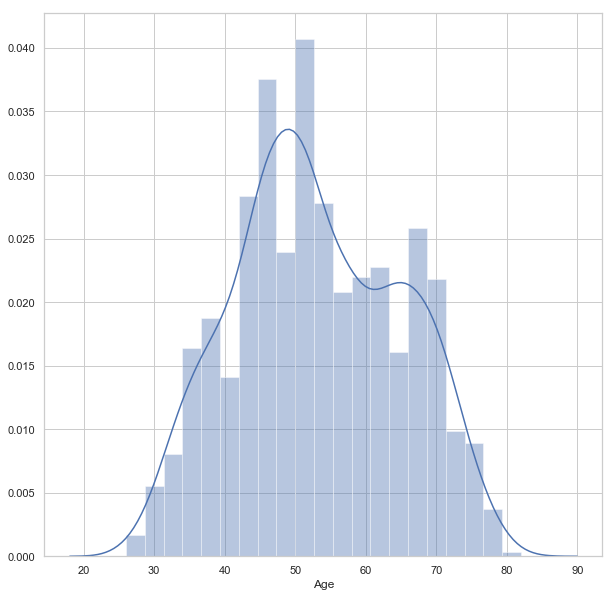

In [218]:
age_clean = df_inicial[df_inicial['Age'] < 100]

# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(10, 10)) # Two column paper. Each column is about 3.15 inch wide.                                                                        
color = sns.color_palette("Set2", 6)


ax = sns.distplot(age_clean['Age'])

### Criação da feature: Age_cluster

- Cluster 1: grupo de 0 a 40;
- Cluster 2: grupo de 40 a 50;
- Cluster 3: grupo de 50 a 60;
- Cluster 4: grupo de 60 a 70;
- Cluster 5: grupo de 70 +

In [219]:
# create a new column and use np.select to assign values to it using our lists as arguments
df_inicial['Age_cluster'] = np.select(
    (df_inicial['Age'] <= 40,
    (df_inicial['Age'] > 40) & (df_inicial['Age'] <= 50),
    (df_inicial['Age'] > 50) & (df_inicial['Age'] <= 60),
    (df_inicial['Age'] > 60) & (df_inicial['Age'] <= 70),
    (df_inicial['Age'] > 70)),
    ('0-40', '40-50', '50-60', '60-70', '70-+')
    )

# display updated DataFrame
df_inicial.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,65,60-70
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,68,60-70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,57,50-60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,38,0-40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,41,40-50


In [220]:
df_inicial.groupby('Age_cluster').size().sort_values()

Age_cluster
70-+     182
0-40     346
60-70    473
50-60    585
40-50    654
dtype: int64

As idades do grupo estudado estão massivamente entre 40 e 60 anos, conforme acima

### 01.2 - Education

In [221]:
df_inicial['Education'].describe()

count           2240
unique             5
top       Graduation
freq            1127
Name: Education, dtype: object

In [222]:
education = df_inicial.groupby('Education').agg({'Education' : 'count'}).rename(
                        columns = {'Education' : 'Count'}).sort_values('Count',ascending=False)

education['Rate'] = education['Count'] / education['Count'].sum()
education['Cumulative'] = education['Rate'].cumsum()
education.round(decimals = 2)

,Count,Rate,Cumulative
Education,,,
Graduation,1127,0.50,0.50
PhD,486,0.22,0.72
Master,370,0.17,0.89
2n Cycle,203,0.09,0.98
Basic,54,0.02,1.00


### 01.3 - Marital_Status

In [223]:
mstats = df_inicial.groupby('Marital_Status').agg({'Marital_Status' : 'count'}).rename(
                        columns = {'Marital_Status' : 'Count'}).sort_values('Count',ascending=False)

mstats['Rate'] = mstats['Count'] / mstats['Count'].sum()
mstats['Cumulative'] = mstats['Rate'].cumsum() 
mstats.round(decimals = 2)

,Count,Rate,Cumulative
Marital_Status,,,
Married,864,0.39,0.39
Together,580,0.26,0.64
Single,480,0.21,0.86
Divorced,232,0.10,0.96
Widow,77,0.03,1.00
Alone,3,0.00,1.00
Absurd,2,0.00,1.00
YOLO,2,0.00,1.00


### Criação da feature: Status_cluster

- Cluster 1: married, together;
- Cluster 2: single, divorced, widow, alone;
- Cluster 3: others;

### 01.4 - Income

In [224]:
df_inicial['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [225]:
df_inicial['Income'].fillna(value = (df_inicial['Income'].mean()), inplace=True)

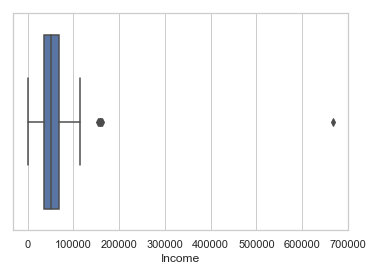

In [226]:
ax = sns.boxplot(x = df_inicial['Income'])

In [227]:
df_inicial.loc[df_inicial['Income'] > 100000].sort_values('Income', ascending = False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_cluster
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,0,3,11,0,45,40-50
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,0,0,0,0,0,3,11,0,46,40-50
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,3,11,0,40,0-40
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,0,0,0,0,0,3,11,0,51,50-60
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,3,11,0,49,40-50
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,0,0,0,0,0,3,11,0,45,40-50
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,3,11,0,73,70-+
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,3,11,0,47,40-50
1898,4619,1945,PhD,Single,113734.0,0,0,2014-05-28,9,6,...,0,0,0,0,0,3,11,0,77,70-+
646,4611,1970,Graduation,Together,105471.0,0,0,2013-01-21,36,1009,...,0,1,1,0,0,3,11,1,52,50-60


C:\Users\Alexandre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


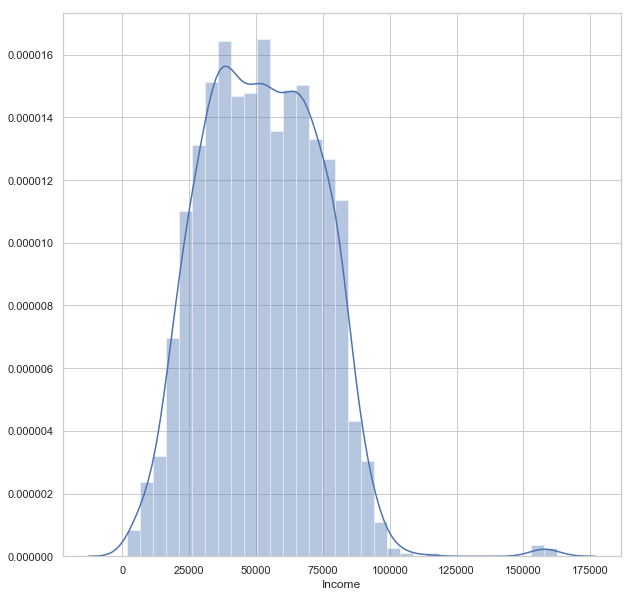

In [228]:
income_clean =  df_inicial[df_inicial['Income'] < 200000]

# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(10, 10)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                         
color = sns.color_palette("Set2", 6)


ax = sns.distplot(income_clean['Income'])

Quanto da renda estes consumidores estão comprometendo com a companhia?

In [229]:
df_income = income_clean.iloc[:,9:14]
df_income['Income'] = df_inicial['Income'] 

df_income['return'] = (df_income.iloc[:,0:5].sum(axis = 1))/ 2
df_income['rate'] = (df_income['return'] / df_income['Income']) * 100

df_income.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Income,return,rate
0,635,88,546,172,88,58138.0,764.5,1.314975
1,11,1,6,2,1,46344.0,10.5,0.022657
2,426,49,127,111,21,71613.0,367.0,0.512477
3,11,4,20,10,3,26646.0,24.0,0.090070
4,173,43,118,46,27,58293.0,203.5,0.349099


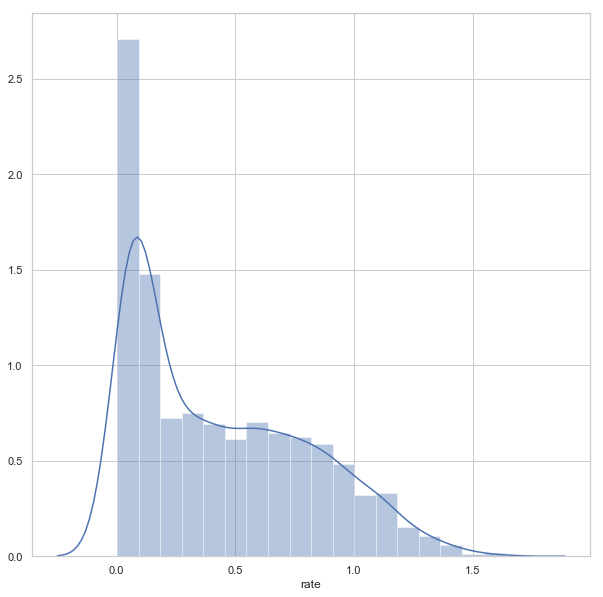

In [230]:
# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(10, 10)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                         
color = sns.color_palette("Set2", 6)

teste = df_income[df_income['rate'] < 5]

ax = sns.distplot(teste['rate'])

In [231]:
df_income[df_income['rate'] > 5]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Income,return,rate
21,1,1,1725,1,1,2447.0,864.5,35.328974


In [232]:
df_inicial['Income'] = np.where(df_inicial['Income'] > 200000, df_inicial['Income'].mean() ,df_inicial['Income'])

### 01.5 - Kidhome

In [233]:
df_inicial['Kidhome'].describe()

count    2240.000000
mean        0.444196
std         0.538398
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Kidhome, dtype: float64

In [234]:
kids = df_inicial.groupby('Kidhome').agg({'Kidhome' : 'count'}).rename(
                        columns = {'Kidhome' : 'Count'}).sort_values('Count',ascending=False).reset_index()

kids['Rate'] = kids['Count'] / kids['Count'].sum()
kids.round(decimals = 2)

,Kidhome,Count,Rate
0,0,1293,0.58
1,1,899,0.40
2,2,48,0.02


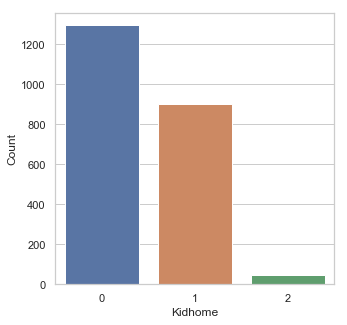

In [235]:
# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(5, 5)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                         
color = sns.color_palette("Set2", 6)


ax = sns.barplot(kids['Kidhome'], kids['Count'])

### 01.6 - Teenhome

In [236]:
df_inicial['Teenhome'].describe()

count    2240.000000
mean        0.506250
std         0.544538
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Teenhome, dtype: float64

In [237]:
teen = df_inicial.groupby('Teenhome').agg({'Teenhome' : 'count'}).rename(
                        columns = {'Teenhome' : 'Count'}).sort_values('Count',ascending=False).reset_index()

teen['Rate'] = teen['Count'] / teen['Count'].sum()
teen.round(decimals = 2)

,Teenhome,Count,Rate
0,0,1158,0.52
1,1,1030,0.46
2,2,52,0.02


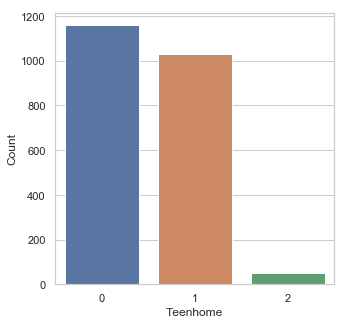

In [238]:
# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(5, 5)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                         
color = sns.color_palette("Set2", 6)


ax = sns.barplot(teen['Teenhome'], teen['Count'])

### 01.7 - Dt_Customer
date of consumer's enrollment with the company

In [239]:
df_inicial['Dt_Customer'].describe()

count           2240
unique           663
top       2012-08-31
freq              12
Name: Dt_Customer, dtype: object

In [240]:
df_inicial['Dt_Customer'] = pd.to_datetime(df_inicial['Dt_Customer'], format = '%Y-%m-%d')

In [241]:
df_inicial['Dt_Customer'].min()

Timestamp('2012-07-30 00:00:00')

In [242]:
df_inicial['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [243]:
today = datetime.now()
year = timedelta(days=365)

df_inicial['Years_on_plataform'] = ((today - df_inicial['Dt_Customer']) / year).round(2)

In [244]:
df_inicial.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_cluster,Years_on_plataform
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,65,60-70,9.42
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,68,60-70,7.92
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,57,50-60,8.46
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,38,0-40,7.99
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,41,40-50,8.05


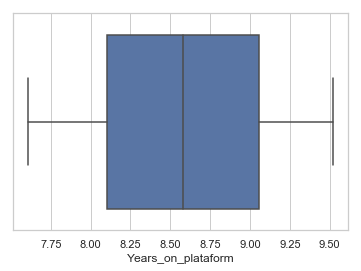

In [245]:
ax = sns.boxplot(x = df_inicial['Years_on_plataform'])

C:\Users\Alexandre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


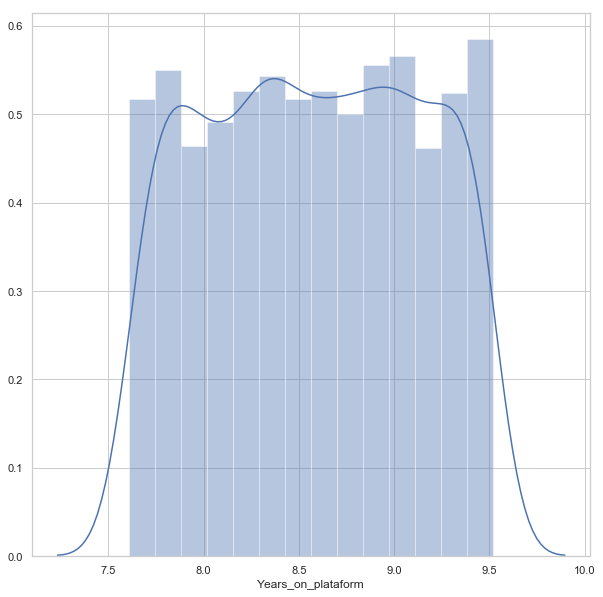

In [246]:
income_clean =  df_inicial[df_inicial['Income'] < 200000]

# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(10, 10)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                         
color = sns.color_palette("Set2", 6)


ax = sns.distplot(df_inicial['Years_on_plataform'])

C:\Users\Alexandre\Anaconda3\lib\site-packages\scipy\stats\stats.py:2831: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.mean(atmp[sl], axis=axis)


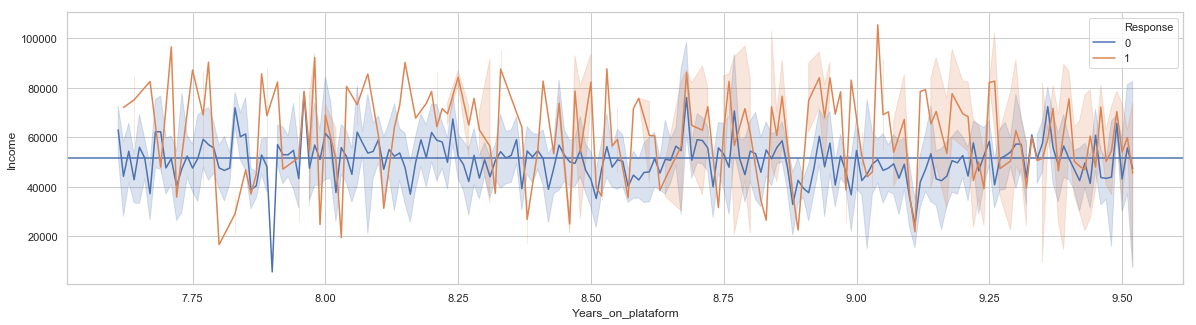

In [247]:
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(20, 5)) # Two column paper. Each column is about 3.15 inch wide.     
plt.axhline(stats.trim_mean(df_inicial['Income'], 0.1))


sns.lineplot(data=df_inicial[df_inicial['Income'] < 200000], 
    x="Years_on_plataform", y="Income", hue = 'Response');

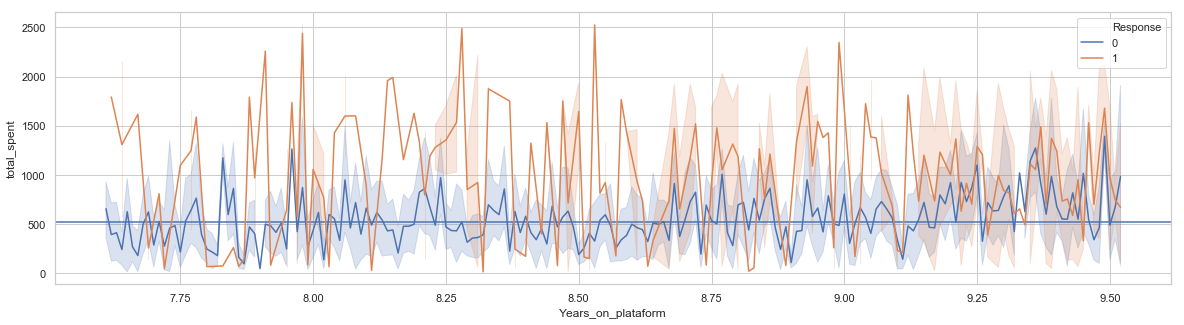

In [248]:
df_inicial['total_spent'] = df_inicial['MntWines'] + df_inicial['MntFruits'] + df_inicial['MntMeatProducts'] + df_inicial['MntFishProducts'] + df_inicial['MntSweetProducts'] + df_inicial['MntGoldProds']  

sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(20, 5))    
plt.axhline(stats.trim_mean(df_inicial['total_spent'], 0.1))

sns.lineplot(data=df_inicial[df_inicial['Income'] < 200000], 
    x="Years_on_plataform", y='total_spent' 
             , hue = 'Response');

Acima podemos ver que a progressão de tempo de plataforma não afeta a feature Income e nem total_spent, entretanto quando fazemos a distinção das pessoas que adquiriram o gadget podemos perceber que estas pessoas possuem uma renda anual e o gasto na plataforma maior do que a média da amostra.

### 01.8 - Recency

In [249]:
df_inicial['Recency'].describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

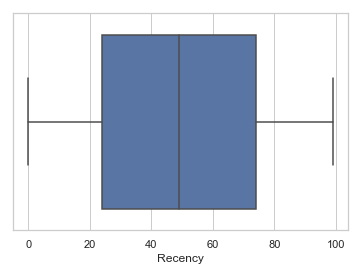

In [250]:
ax = sns.boxplot(x = df_inicial['Recency'])

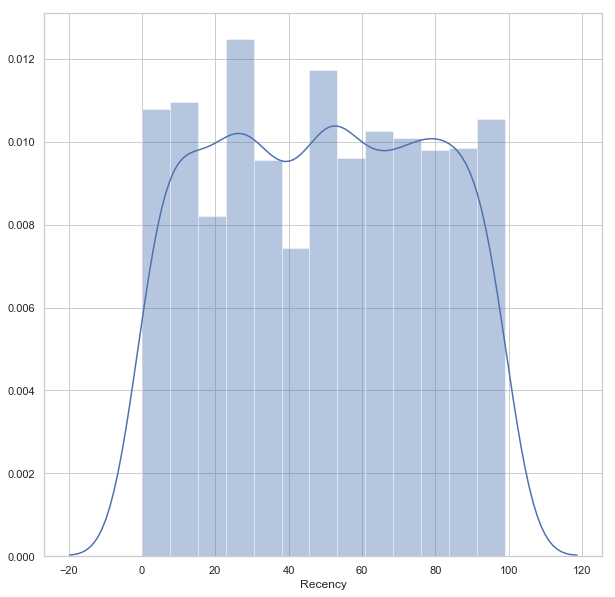

In [251]:
# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(10, 10)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                         
color = sns.color_palette("Set2", 6)


ax = sns.distplot(df_inicial['Recency'])

## Resumo do Grupo de Controle

# 02 - Perfil dos Produtos

In [252]:
df_products = df_inicial.iloc[:,9:15]
df_products.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


In [253]:
total_amount_products = df_products.sum()
total_amount_products

MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64

In [254]:
total_purchases_products = (df_products != 0).sum()
total_purchases_products

MntWines            2227
MntFruits           1840
MntMeatProducts     2239
MntFishProducts     1856
MntSweetProducts    1821
MntGoldProds        2179
dtype: int64

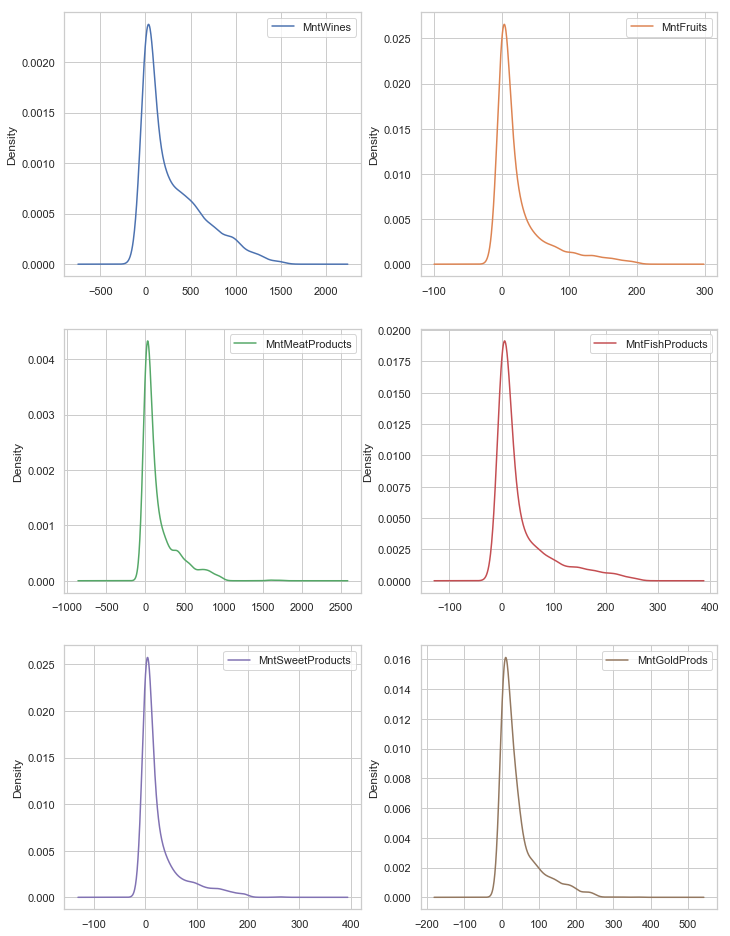

In [255]:
# Density Plots
df_products.plot(kind = 'density',layout = (3,2), subplots = True,  sharex = False, figsize = (11.7, 16.5))
plt.show()

In [371]:
df_produdcts_reshape = pd.DataFrame((total_purchases_products, total_amount_products)).T
df_produdcts_reshape = df_produdcts_reshape.rename(columns = {0 : 'Tickets', 1 : 'Total_spent_2y'})

df_produdcts_reshape['Total_spent_1y'] = df_produdcts_reshape['Total_spent_2y'] / 2
df_produdcts_reshape['Ticket_mean'] = (df_produdcts_reshape['Total_spent_2y'] / df_produdcts_reshape['Tickets']).round(2)
df_produdcts_reshape['Market_share'] = (df_produdcts_reshape['Total_spent_1y'] / df_produdcts_reshape['Total_spent_1y'].sum()) * 100

df_produdcts_reshape.sort_values('Total_spent_2y', ascending = False).round(2)

,Tickets,Total_spent_2y,Total_spent_1y,Ticket_mean,Market_share
MntWines,2227,680816,340408.0,305.71,50.17
MntMeatProducts,2239,373968,186984.0,167.02,27.56
MntGoldProds,2179,98609,49304.5,45.25,7.27
MntFishProducts,1856,84057,42028.5,45.29,6.19
MntSweetProducts,1821,60621,30310.5,33.29,4.47
MntFruits,1840,58917,29458.5,32.02,4.34


# 03 - Perfil dos Meios de Venda

### 03.1 - NumDealsPurchases
number of purchases made with discount

In [257]:
df_inicial['NumDealsPurchases'].describe()

count    2240.000000
mean        2.325000
std         1.932238
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64

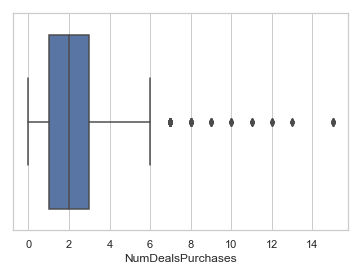

In [258]:
ax = sns.boxplot(x = df_inicial['NumDealsPurchases'])

C:\Users\Alexandre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


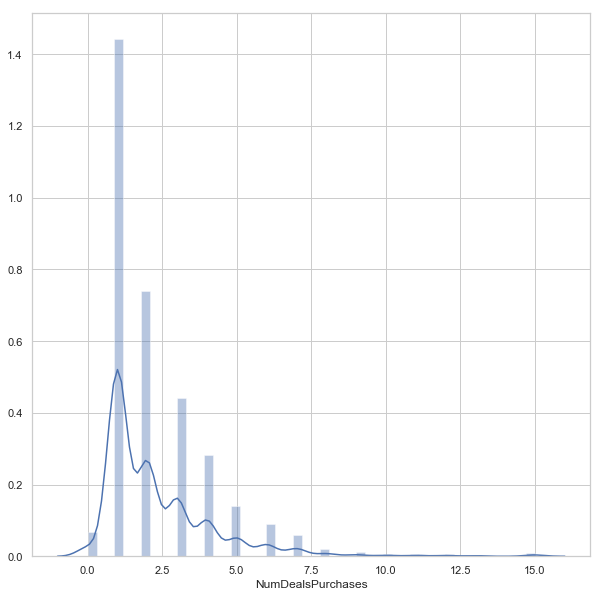

In [259]:
# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook")                                                  
plt.figure(figsize=(10, 10)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                         
color = sns.color_palette("Set2", 6)


ax = sns.distplot(df_inicial['NumDealsPurchases'])

### 03.2.1 - NumWebPurchases
number of purchases made trough web

In [260]:
df_inicial['NumWebPurchases'].describe()

count    2240.000000
mean        4.084821
std         2.778714
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64

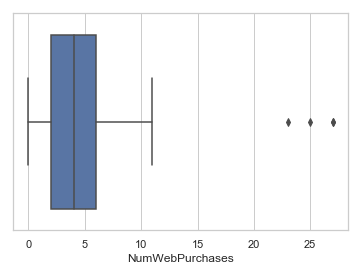

In [261]:
ax = sns.boxplot(x = df_inicial['NumWebPurchases'])

### 03.2.1 - NumWebVisitsMonth
number of visits to website in the last month

In [262]:
df_inicial['NumWebVisitsMonth'].describe()

count    2240.000000
mean        5.316518
std         2.426645
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

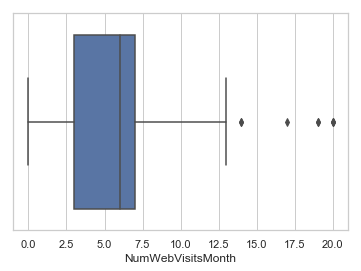

In [263]:
ax = sns.boxplot(x = df_inicial['NumWebVisitsMonth'])

### 03.3 - NumCatalogPurchases
number of purchases made trough catalog

In [264]:
df_inicial['NumCatalogPurchases'].describe()

count    2240.000000
mean        2.662054
std         2.923101
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64

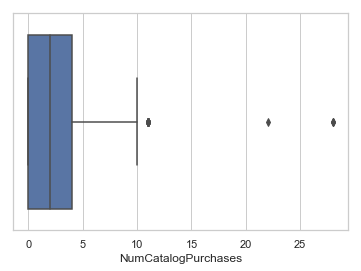

In [265]:
ax = sns.boxplot(x = df_inicial['NumCatalogPurchases'])

### 03.4 - NumStorePurchases
number of purchases made trough store

In [266]:
df_inicial['NumStorePurchases'].describe()

count    2240.000000
mean        5.790179
std         3.250958
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64

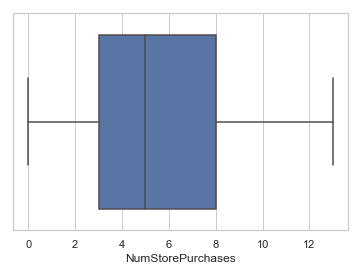

In [267]:
ax = sns.boxplot(x = df_inicial['NumStorePurchases'])

In [268]:
df_inicial['Z_CostContact'].describe()

count    2240.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Z_CostContact, dtype: float64

In [269]:
df_inicial['Z_CostContact'].nunique()

1

In [270]:
df_inicial['Z_Revenue'].nunique()

1

# 04 - Analise das Campanhas

In [271]:
campagnes = pd.concat((df_inicial.iloc[:,20:26], df_inicial['Response'],df_inicial['NumDealsPurchases'] ), axis = 1)
campagnes.head()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,NumDealsPurchases
0,0,0,0,0,0,0,1,3
1,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,5


In [272]:
campagnes_list = list(campagnes.columns)
campagnes_hist = []

for n in campagnes_list:
    x = (len(df_inicial[df_inicial[n] != 0]))
    campagnes_hist.append(x)

campagnes_hist = pd.DataFrame(campagnes_hist, index = campagnes_list, columns = ['Obs'])



campagnes_hist['rate'] = ((campagnes_hist['Obs'] / len(df_inicial)) * 100).round(2)

campagnes_hist

,Obs,rate
AcceptedCmp3,163,7.28
AcceptedCmp4,167,7.46
AcceptedCmp5,163,7.28
AcceptedCmp1,144,6.43
AcceptedCmp2,30,1.34
Complain,21,0.94
Response,334,14.91
NumDealsPurchases,2194,97.95


# Criação do Perfil de Consumidor de Vinho

Na analise exploratória anterior dos dados foi constatadoque o produto que mais gera Income para a companhia é o **vinho**, representando 50% do valor vendido nos últimos dois anos. <p>
Nesta seção o perfil de consumidores será explorado afim de criar uma segmentação de clientes, fazendo a agrupamento dos clientes através do algoritmo KNN e a partir deste resultado iremos estudar as caracteristicas dos consumidores de vinho.

In [374]:
df_wine_grouped = df_inicial.groupby('Education').agg({'MntWines' : 'sum', 'ID' : 'count', 'Age' : 'mean', 'Income' : 'mean'}).sort_values(by = 'MntWines', ascending = False)
df_wine_grouped.round(2)

,MntWines,ID,Age,Income
Education,,,,
Graduation,320371,1127,52.36,52170.57
PhD,196585,486,55.96,56105.21
Master,123238,370,55.12,52908.48
2n Cycle,40231,203,49.98,47701.38
Basic,391,54,44.54,20306.26


# Criação do Modelo de Clusterização - KNN

In [398]:
df_modelo = df_inicial
#df_modelo = df_modelo.drop('ID', axis = 1)

## 01 - Pré Processamento

### 01.1 - Dados Qualitativos

In [399]:
df_modelo.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 3 columns):
Education         2240 non-null object
Marital_Status    2240 non-null object
Age_cluster       2240 non-null object
dtypes: object(3)
memory usage: 52.6+ KB


In [400]:
# Conforme descrito no EDA, esta feature esta balanceada e basicamente descreve dois grandes grupos de dados: pessoas que estão com alguém(0)e pessoas que não estão com alguém(1).
# Esta decisão foi tomada para evitar o overfitting do modelo.

marital_map = {'Married' : 0,
               'Together' : 0,
               'Single' : 1,
               'Divorced' : 1,
               'Widow' : 1,
               'Alone' : 1,
               'Absurd' : 1,
               'YOLO' : 1}

df_modelo = df_modelo.replace(marital_map)

In [401]:
# Conforme descrito no EDA, esta feature esta balanceada e basicamente descreve dois grandes grupos de dados: pessoas que estão com alguém(0)e pessoas que não estão com alguém(1).

education_map = {'Graduation' : 3,
               'PhD' : 5,
               'Master' : 4,
               '2n Cycle' : 2,
               'Basic' : 0}

df_modelo = df_modelo.replace(education_map)

In [402]:
df_modelo = df_modelo.drop('Age_cluster', axis = 1)

In [403]:
df_modelo.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Empty DataFrame

### 01.2 - Dados Quantitativos

In [284]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
Year_Birth             2240 non-null int64
Education              2240 non-null int64
Marital_Status         2240 non-null int64
Income                 2240 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null datetime64[ns]
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 non-null int64
AcceptedCmp4          

In [405]:
# Deletando as features que representam uma mesma informação, criadas durante a fase de EDA

features_drop = ['Year_Birth', 'Dt_Customer', 'Z_CostContact','Z_Revenue', 'total_spent']
df_modelo = df_modelo.drop(features_drop, axis = 1)

In [406]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
ID                     2240 non-null int64
Education              2240 non-null int64
Marital_Status         2240 non-null int64
Income                 2240 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 non-null int64
AcceptedCmp4           2240 non-null int64
AcceptedCmp5           2240 non

In [407]:
continuous = ['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
             'NumWebVisitsMonth','Complain','Age','Years_on_plataform']

df_continuous = df_modelo.loc[:,continuous]

In [408]:
df_continuous.skew()

Income                  0.348867
Recency                -0.001987
MntWines                1.175771
MntFruits               2.102063
MntMeatProducts         2.083233
MntFishProducts         1.919769
MntSweetProducts        2.136081
MntGoldProds            1.886106
NumDealsPurchases       2.418569
NumWebPurchases         1.382794
NumCatalogPurchases     1.880989
NumStorePurchases       0.702237
NumWebVisitsMonth       0.207926
Complain               10.188972
Age                     0.349944
Years_on_plataform     -0.015147
dtype: float64

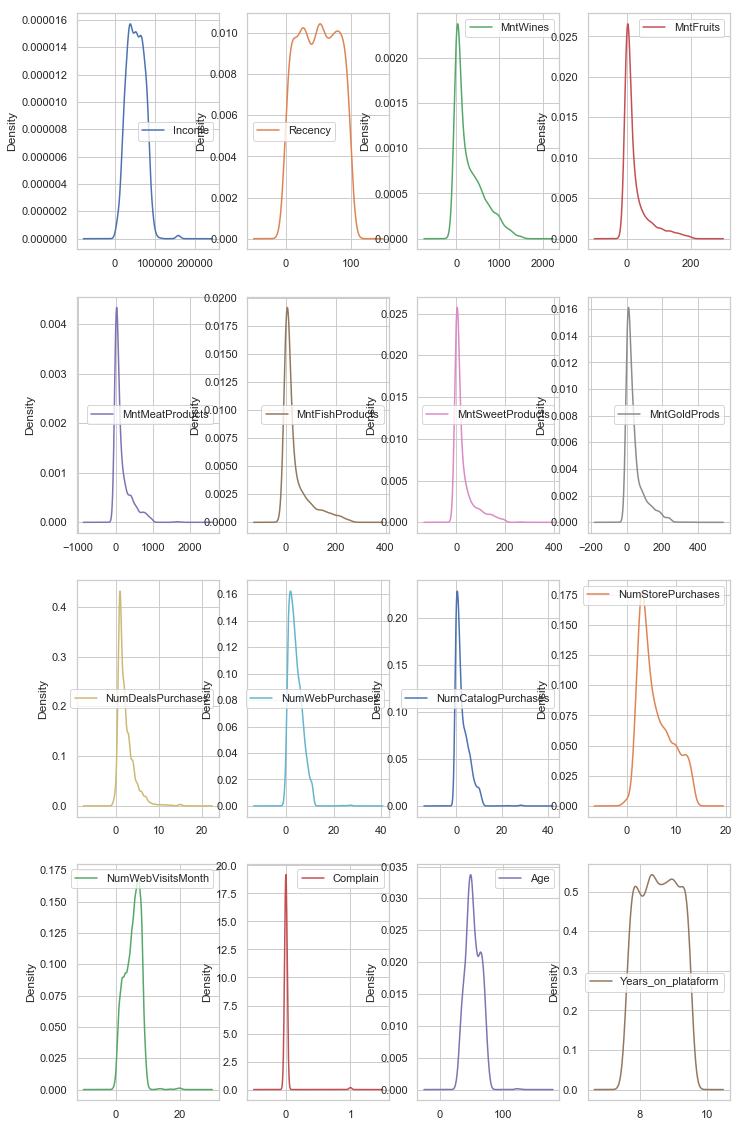

In [423]:
# Density Plots
df_continuous.plot(kind = 'density',layout = (4,4), subplots = True,  sharex = False, figsize = (11.7, 20));

In [413]:
from sklearn.preprocessing import StandardScaler

# Gerando os dados padronizados
standard = StandardScaler().fit_transform(df_continuous)

In [414]:
from sklearn.preprocessing import Normalizer

# Gerando os dados normalizados
scaler = Normalizer().fit_transform(standard)

In [415]:
# Criando um novo dataset normalizado
indice_colunas = list(df_continuous.columns[:])

df_continuous_norm = pd.DataFrame(scaler, columns = indice_colunas)

df_continuous_norm.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Years_on_plataform
0,0.054602,0.058197,0.186469,0.294092,0.318377,0.466684,0.279861,0.159824,0.066229,0.267125,0.475923,-0.104398,0.131525,-0.018439,0.186766,0.289280
1,-0.087000,-0.126905,-0.287929,-0.210470,-0.235914,-0.215149,-0.208883,-0.241134,-0.055648,-0.367291,-0.188116,-0.385720,-0.043153,-0.032178,0.408744,-0.391494
2,0.315996,-0.274804,0.124896,0.196544,-0.060957,0.463217,-0.050584,-0.013348,-0.236171,0.485264,-0.078005,0.445988,-0.186849,-0.033497,0.109374,-0.071642
3,-0.389606,-0.262741,-0.286574,-0.184642,-0.214380,-0.165915,-0.191946,-0.246311,-0.055386,-0.247059,-0.299880,-0.181326,0.092746,-0.032026,-0.417492,-0.348021
4,0.110019,0.577562,-0.144953,0.156439,-0.080811,0.057806,-0.000568,-0.207302,0.515872,0.122727,0.043081,0.024050,-0.048604,-0.036242,-0.379164,-0.353449


In [416]:
df_continuous_norm.skew()

Income                 -0.168969
Recency                -0.004341
MntWines                0.852250
MntFruits               1.445836
MntMeatProducts         1.234729
MntFishProducts         1.339117
MntSweetProducts        1.463737
MntGoldProds            1.233229
NumDealsPurchases       1.376978
NumWebPurchases         0.521097
NumCatalogPurchases     0.744519
NumStorePurchases       0.565047
NumWebVisitsMonth      -0.145468
Complain               10.085185
Age                     0.176902
Years_on_plataform     -0.058935
dtype: float64

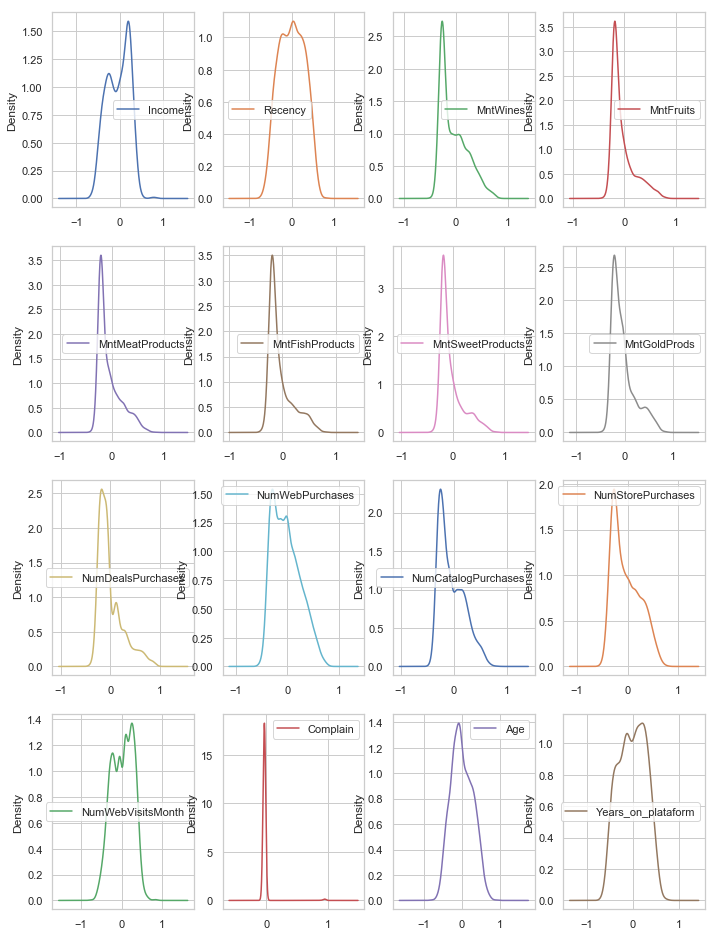

In [417]:
# Density Plots
df_continuous_norm.plot(kind = 'density',layout = (4,4), subplots = True,  sharex = False, figsize = (11.7, 16.5));

In [424]:
for  i in continuous:
    df_modelo[i] = df_continuous_norm[i]

df_modelo.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_on_plataform
0,5524,3,1,0.054602,0,0,0.058197,0.186469,0.294092,0.318377,...,0.131525,0,0,0,0,0,-0.018439,1,0.186766,0.289280
1,2174,3,1,-0.087000,1,1,-0.126905,-0.287929,-0.210470,-0.235914,...,-0.043153,0,0,0,0,0,-0.032178,0,0.408744,-0.391494
2,4141,3,0,0.315996,0,0,-0.274804,0.124896,0.196544,-0.060957,...,-0.186849,0,0,0,0,0,-0.033497,0,0.109374,-0.071642
3,6182,3,0,-0.389606,1,0,-0.262741,-0.286574,-0.184642,-0.214380,...,0.092746,0,0,0,0,0,-0.032026,0,-0.417492,-0.348021
4,5324,5,0,0.110019,1,0,0.577562,-0.144953,0.156439,-0.080811,...,-0.048604,0,0,0,0,0,-0.036242,0,-0.379164,-0.353449


# KNN

In [425]:
# Imports
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl

# Criando o modelo
kmeans = KMeans(n_clusters = 4, random_state = 111)
kmeans.fit(df_modelo)

KMeans(n_clusters=4, random_state=111)

#### Segmentação - Encontrando o Valor Ideal de Clusters

Vamos testar diferentes valores de K (valores de cluster) entre 2 e 10.

Para a inicialização dos clusters, usamos o algoritmo k-means++ que oferece convergência mais rápida para o resultado final.

In [505]:
x = df_modelo.drop('Response', axis =1).values
y = df_modelo.loc[:,'Response'].values

labels =df_modelo.drop('Response', axis =1).columns

In [427]:
# Lista do WCSS
wcss_X1 = []

In [428]:
# Loop para testar os valores de K
for n in range(2, 11):
    modelo = (KMeans(n_clusters = n,
                     init = 'k-means++', 
                     n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))
    modelo.fit(x)
    wcss_X1.append(modelo.inertia_)

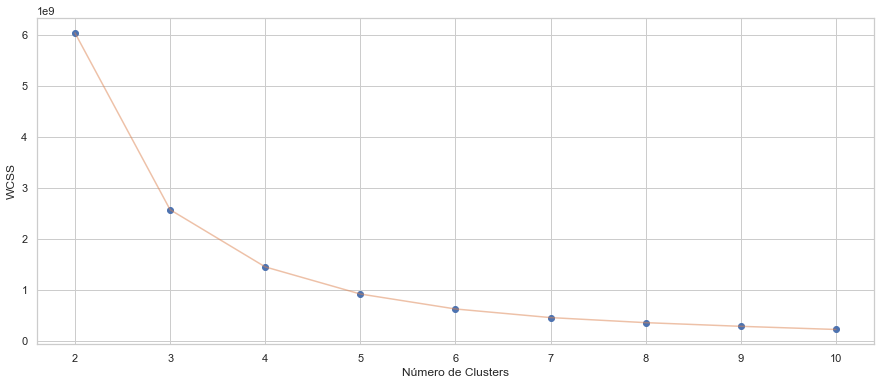

In [429]:
# Plot
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , wcss_X1 , 'o')
plt.plot(np.arange(2 , 11) , wcss_X1 , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('WCSS')
plt.show()

In [430]:
kmeans.labels_

array([1, 0, 1, ..., 2, 2, 3])

In [480]:
modelo = (KMeans(n_clusters = 4,
                     init = 'random', 
                     n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))
modelo.fit(x)
wcss_X1.append(modelo.inertia_)

In [481]:
# Criando o Cluster Map
cluster_map = pd.DataFrame(df_modelo)
cluster_map['cluster'] = kmeans.labels_
cluster_map["ID"] = cluster_map.index + 1

In [482]:
pca = PCA(n_components = 2).fit(df_modelo)
# Aplicando o PCA
pca_2d = pca.transform(df_modelo)

In [483]:
pca_2d.shape

(2240, 2)

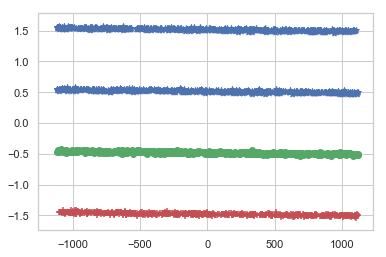

In [484]:
# Gerando "labels" para os resultados dos clusters
for i in range(0, pca_2d.shape[0]):
    
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='r', marker = '+')
        
    elif kmeans.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='g', marker = 'o')

    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='b', marker = '*')
        
    elif kmeans.labels_[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='b', marker = '*')
        
    elif kmeans.labels_[i] == 4:
        c5 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='b', marker = '*')
        
        pl.legend([c1, c2, c3, c4, c5],['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
        pl.title('Clusters K-means em 4 clusters')
pl.show()

In [485]:
cluster_map['cluster'].nunique()

4

In [490]:
cluster_map.groupby('cluster').size()

cluster
0    563
1    594
2    528
3    555
dtype: int64

In [500]:
df_wine = pd.concat((df_inicial, cluster_map.loc[:,'cluster']), axis = 1)
df_wine['Marital_Status'] = df_wine['Marital_Status'].replace(marital_map)

agreggations = {'ID' : 'count',
                'Age' : 'mean',
                'Years_on_plataform' : 'mean',
                'Income' : 'mean',
                'MntWines' : 'sum', 
                'NumDealsPurchases' : 'mean',
                'NumWebPurchases' : 'mean',
                'NumCatalogPurchases' : 'mean',
                'NumStorePurchases' : 'mean',
                'NumWebVisitsMonth' : 'mean',
                'Complain' : 'sum',
                'Recency' : 'mean'}

df_wine = df_wine.groupby(['cluster','Marital_Status', 'Education']).agg(agreggations).sort_values(by = 'MntWines', ascending = False).reset_index()

df_wine['wine_repr'] = ((df_wine['MntWines'] / df_wine['MntWines'].sum()).round(2))
df_wine['wine_repr_cum'] = ((df_wine['MntWines'] / df_wine['MntWines'].sum()).round(2)).cumsum()
df_wine['renda_vinho'] =  df_wine['MntWines'] / (df_wine['Income'] / 2)

df_wine['popu_rate'] = ((df_wine['ID'] / df_wine['ID'].sum()).round(2))
df_wine['popu_rate'] = ((df_wine['popu_rate'] / df_wine['popu_rate'].sum()).round(2)).cumsum()

(df_wine.head(11)).round(2)

,cluster,Marital_Status,Education,ID,Age,Years_on_plataform,Income,MntWines,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Recency,wine_repr,wine_repr_cum,renda_vinho,popu_rate
0,3,0,Graduation,196,52.84,8.59,52413.04,56757,2.34,4.28,2.72,6.18,5.14,4,48.24,0.08,0.08,2.17,0.09
1,1,0,Graduation,179,52.97,8.65,51683.86,54710,2.39,4.20,2.99,5.69,5.54,2,50.01,0.08,0.16,2.12,0.17
2,0,0,Graduation,181,51.99,8.55,52224.41,50541,2.30,4.23,2.52,5.91,5.22,1,48.96,0.07,0.23,1.94,0.25
3,2,0,Graduation,163,51.93,8.60,51253.44,45323,2.30,3.98,2.48,5.72,5.34,3,50.20,0.07,0.30,1.77,0.32
4,1,0,PhD,87,55.15,8.47,57698.93,39122,2.43,4.83,3.28,6.92,5.43,0,47.92,0.06,0.36,1.36,0.36
5,0,0,PhD,71,55.10,8.72,60960.72,33351,2.42,4.55,3.46,6.48,5.06,0,52.73,0.05,0.41,1.09,0.39
6,1,1,Graduation,112,52.40,8.61,52374.82,32893,2.12,4.35,3.06,5.62,5.38,0,54.69,0.05,0.46,1.26,0.44
7,3,1,Graduation,107,51.70,8.61,54910.59,30302,2.12,4.00,2.86,5.67,5.11,1,44.02,0.04,0.50,1.10,0.49
8,3,0,PhD,77,55.91,8.57,55590.52,28398,2.48,3.75,2.92,5.35,5.40,0,49.61,0.04,0.54,1.02,0.52
9,2,0,PhD,74,56.08,8.39,55071.41,27556,2.12,4.26,2.78,5.61,5.15,0,49.22,0.04,0.58,1.00,0.55


In [558]:
df_wine = pd.concat((df_inicial, cluster_map.loc[:,'cluster']), axis = 1)
df_wine['Marital_Status'] = df_wine['Marital_Status'].replace(marital_map)

agreggations = {'ID' : 'count',
                'Age' : 'mean',
                'Years_on_plataform' : 'mean',
                'Income' : 'mean',
                'MntWines' : 'sum', 
                'MntFruits' : 'sum',
                'MntMeatProducts' : 'sum',
                'MntFishProducts' : 'sum',
                'MntSweetProducts' : 'sum',
                'MntGoldProds' : 'sum',
                'NumDealsPurchases' : 'mean',
                'NumWebPurchases' : 'mean',
                'NumCatalogPurchases' : 'mean',
                'NumStorePurchases' : 'mean',
                'NumWebVisitsMonth' : 'mean',
                'Complain' : 'sum',
                'Recency' : 'mean'}

df_wine = df_wine.groupby(['cluster']).agg(agreggations).sort_values(by = 'MntWines', ascending = False).reset_index()


df_wine['popu_rate'] = ((df_wine['ID'] / df_wine['ID'].sum()).round(2))
df_wine['popu_rate'] = ((df_wine['popu_rate'] / df_wine['popu_rate'].sum()).round(2)).cumsum()

(df_wine.head(11)).round(2)

,cluster,ID,Age,Years_on_plataform,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Recency,popu_rate
0,1,594,53.31,8.57,52577.69,194203,15343,101668,23148,16357,28290,2.27,4.26,2.88,5.88,5.42,4,50.75,0.27
1,0,563,53.00,8.58,51626.87,166855,14749,92449,22796,15500,24221,2.45,4.01,2.54,5.74,5.28,2,49.14,0.52
2,3,555,53.13,8.61,52178.39,162219,15177,93486,20569,15008,24614,2.30,4.03,2.63,5.77,5.31,7,46.06,0.77
3,2,528,53.34,8.54,51445.73,157539,13648,86365,17544,13756,21484,2.28,4.02,2.59,5.76,5.25,8,50.44,1.01


In [561]:
df_wine = pd.concat((df_inicial, cluster_map.loc[:,'cluster']), axis = 1)
df_wine['Marital_Status'] = df_wine['Marital_Status'].replace(marital_map)

agreggations = {'ID' : 'count',
                'Age' : 'mean',
                'Years_on_plataform' : 'mean',
                'Income' : 'mean',
                'AcceptedCmp1' : 'sum', 
                'AcceptedCmp2' : 'sum',
                'AcceptedCmp3' : 'sum',
                'AcceptedCmp4' : 'sum',
                'AcceptedCmp5' : 'sum',
                'Response' : 'sum',
                'NumDealsPurchases' : 'mean',
                'NumWebPurchases' : 'mean',
                'NumCatalogPurchases' : 'mean',
                'NumStorePurchases' : 'mean',
                'NumWebVisitsMonth' : 'mean',
                'Complain' : 'sum',
                'Recency' : 'mean'}

df_wine = df_wine.groupby(['cluster']).agg(agreggations).reset_index()


df_wine['popu_rate'] = ((df_wine['ID'] / df_wine['ID'].sum()).round(2))
df_wine['popu_rate'] = ((df_wine['popu_rate'] / df_wine['popu_rate'].sum()).round(2)).cumsum()

(df_wine.head(11)).round(2)

,cluster,ID,Age,Years_on_plataform,Income,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Recency,popu_rate
0,0,563,53.00,8.58,51626.87,38,7,45,45,38,86,2.45,4.01,2.54,5.74,5.28,2,49.14,0.25
1,1,594,53.31,8.57,52577.69,44,12,50,46,50,98,2.27,4.26,2.88,5.88,5.42,4,50.75,0.52
2,2,528,53.34,8.54,51445.73,31,2,35,42,40,74,2.28,4.02,2.59,5.76,5.25,8,50.44,0.76
3,3,555,53.13,8.61,52178.39,31,9,33,34,35,76,2.30,4.03,2.63,5.77,5.31,7,46.06,1.01


# Criação do Modelo - Classificador

In [524]:
x = df_modelo.drop(['Response', 'ID'], axis =1).values
y = df_modelo.loc[:,'Response'].values

labels =df_modelo.drop(['Response', 'ID'], axis =1).columns

In [531]:
modelo_v1 = DecisionTreeClassifier(max_depth = 5, 
                                   max_features = 15, 
                                   criterion = 'entropy', 
                                   min_samples_leaf = 2, 
                                   min_samples_split = 2)

In [532]:
modelo_v1.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=15,
                       min_samples_leaf=2)

In [522]:
# Definindo o nome do arquivo com a árvore de decisão
arquivo = 'C:/Users/Alexandre/Documents/Felix/Projetos/Prova_iFood/tree_modelo_v1.dot'

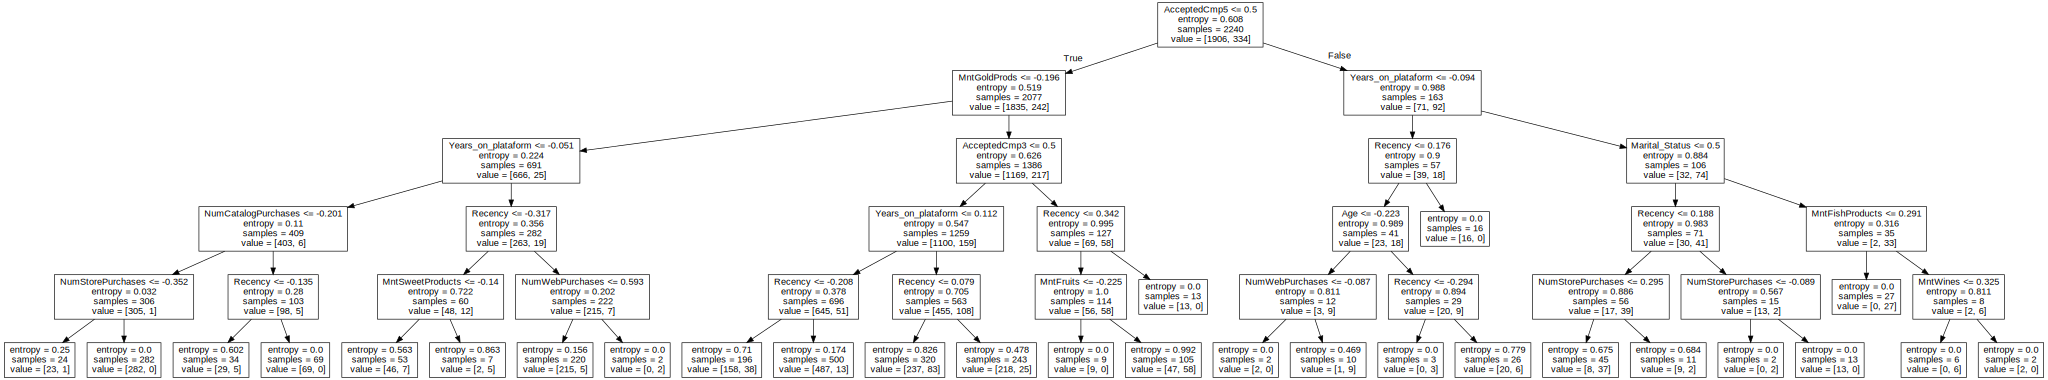

In [533]:
# Gerando o gráfico da árvore de decisão
export_graphviz(modelo_v1, out_file = arquivo, feature_names = labels)
with open(arquivo) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Ensemble 

In [545]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [542]:
# Cria o classificador com uma árvore de decisão
clf = DecisionTreeClassifier(max_depth = 10, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, x, y)
mean = scores.mean()
print(scores)
print(mean)

[0.81696429 0.84821429 0.85044643 0.85714286 0.82366071]
0.8392857142857142


In [543]:
# Cria o classificador com Random Forest
clf = RandomForestClassifier(n_estimators = 10, max_depth = 10, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, x, y)
mean = scores.mean()
print(scores)
print(mean)

[0.88839286 0.87276786 0.87276786 0.86830357 0.890625  ]
0.8785714285714284


In [544]:
# Cria o classificador com Extra Tree
clf = ExtraTreesClassifier(n_estimators = 10, max_depth = 10, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, x, y)
mean = scores.mean()
print(scores)
print(mean)

[0.87723214 0.86607143 0.875      0.86383929 0.86383929]
0.8691964285714286


#  Adaboost

In [546]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

In [547]:
# Construindo o estimador base
estim_base = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1)

In [551]:
# Construindo a primeira versão do modelo Adaboost
ada_clf_v1 = AdaBoostClassifier(base_estimator = estim_base, 
                                learning_rate = 1, 
                                n_estimators = 400, 
                                algorithm = "SAMME")

In [552]:
# Treinamento do modelo
ada_clf_v1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=400)

In [553]:
# Score
scores = cross_val_score(ada_clf_v1, X_test, y_test)
print(scores)
means = scores.mean()
print(means)

[0.87162162 0.88513514 0.86486486 0.87162162 0.90540541]
0.8797297297297296
